# "Suicide China"

#### Corso di Modelli per Dati Categoriali
Anno Accademico 2019/2020


### Studente: Mario Sicilia

Nella ricerca di dati per la stesura di questo progetto mi sono imbattuto nel dataset "SuicideChina.csv", pubblicato da BMJ Open, nel 2015. L’obiettivo degli studiosi Sun J. , Guo X. e Zhang J. , è stato quello di catalogare gravi tentativi di suicidio in alcune contee di Shandong in Cina, con conseguente stato di ricovero o morte del paziente.



In [1]:
dati<-read.csv("SuicideChina.csv")
str(dati)  #struttura dei dati


'data.frame':	2571 obs. of  12 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Person_ID   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Hospitalised: Factor w/ 2 levels "no","yes": 2 1 1 1 2 1 1 2 1 2 ...
 $ Died        : Factor w/ 2 levels "no","yes": 1 2 2 2 1 2 2 1 2 1 ...
 $ Urban       : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year        : int  2010 2009 2010 2011 2009 2009 2010 2010 2010 2011 ...
 $ Month       : int  12 3 2 1 8 11 1 10 7 1 ...
 $ Sex         : Factor w/ 2 levels "female","male": 1 2 2 2 2 2 1 2 2 1 ...
 $ Age         : int  39 83 60 73 51 62 90 54 66 30 ...
 $ Education   : Factor w/ 5 levels "iliterate","primary",..: 3 2 2 2 3 1 1 3 2 3 ...
 $ Occupation  : Factor w/ 10 levels "business/service",..: 3 2 2 2 2 2 2 2 2 5 ...
 $ method      : Factor w/ 9 levels "Cutting","Drowning",..: 5 3 3 3 7 7 7 7 3 8 ...




All'interno del set di dati, sono catalogati 2571 casi di tentato suicidio e per ognuno dei casi sono state rilevate 12 variabili:


•	"X" = Variabile di tipo numerico che conta il numero di osservazioni registrate (da 1 a 2571). 

•	"Person_ID" = Variabile di tipo numerico che identifica il paziente.

•	"Hospitalised" = Variabile binaria che spiega se si è stati ricoverati o meno. (yes, no)

•	"Died" = Variabile binaria utilizzata come variabile di risposta nel nostro studio ed indica lo stato, di morte o meno, del paziente. (Yes, No)

•	"Urban" = Variabile politoma che indica se il paziente proviene da un’area urbana o da una zona rurale.

•	"Year"= Variabile di tipo numerico che indica l’anno in cui il paziente ha tentato il suicidio.

•	"Month"= Variabile di tipo numerico, che indica il mese in cui il paziente ha tentato il suicidio (da 1 a 12)

•	"Sex"= Variabile binaria che indica il sesso dei 2571 pazienti. (male, female)

•	"Age" = Variabile quantitativa che indica l’età dei pazienti.

•	"Education" = Variabile politoma che indica il livello di istruzione dei pazienti. ( Iliterate, Primary, Secondary, Unknown) 

•	"Occupation" = Variabile politoma che ci indica il tipo di occupazione del paziente. ("Others",       "business/service","farming","household","others/unknown","professional","retiree","student", "unemployed")

•	“method" =   Variabile politoma che indica il metodo con cui il paziente ha tentato il suicidio.( "Others",       "Cutting", "Drowning", "Hanging", "Jumping", "Other poison", "Pesticide", "Poison unspec", "unspecified")



** con “paziente” si indicano i soggetti che hanno tentato il suicidio.



###### Analizzando la mera forma dei dati mi sono posto come obiettivo di studio quello di costruire un modello che stimi le eventuali relazioni tra la variabile di risposta scelta: “Died”, e le altre variabili di carattere sociale, culturale e geografico presenti nel dataset.

Mostriamo le prime 6 osservazioni presenti nel set di dati:

In [2]:
head(dati)

,X,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
2,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
3,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
4,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
5,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide
6,6,6,no,yes,no,2009,11,male,62,iliterate,farming,Pesticide


Facendo un summary dei dati, notiamo che questo studio sui gravi tentativi di suicidio riguarda una popolazione prevalentemente rurale e ricopre un arco temporale di tre anni.

In [3]:
summary(dati)

       X            Person_ID      Hospitalised  Died          Urban     
 Min.   :   1.0   Min.   :   1.0   no :1018     no :1315   no     :2213  
 1st Qu.: 643.5   1st Qu.: 643.5   yes:1553     yes:1256   unknown:  81  
 Median :1286.0   Median :1286.0                           yes    : 277  
 Mean   :1286.0   Mean   :1286.0                                         
 3rd Qu.:1928.5   3rd Qu.:1928.5                                         
 Max.   :2571.0   Max.   :2571.0                                         
                                                                         
      Year          Month            Sex            Age        
 Min.   :2009   Min.   : 1.000   female:1328   Min.   : 12.00  
 1st Qu.:2009   1st Qu.: 4.000   male  :1243   1st Qu.: 37.00  
 Median :2010   Median : 6.000                 Median : 53.00  
 Mean   :2010   Mean   : 6.298                 Mean   : 52.63  
 3rd Qu.:2011   3rd Qu.: 9.000                 3rd Qu.: 69.00  
 Max.   :2011   Max.   :

La fase di pre-analisi dei dati mi ha portato, data la natura dello studio, a non utilizzare alcune variabili per la costruzione del modello atto a spiegare la variabile risposta scelta, quali: la variabile “X”, la variabile “ Person ID” e le variabili “Year” e “Month”. Queste ultime sono state trascurate poiché considerate inutili al fine di stimare la probabilità che si verifichi l’evento fatale.



Per comodità cambiamo i livelli di alcune variabili e assegniamo agli eventuali missing values presenti alcuni valori; in particolare sostituendo la moda alle variabili qualitative e la media alle variabili quantitative.


In [4]:
#attribuzione livelli 
Morto<-factor(dati$Died, levels=c("no","yes"), labels=c("no","yes"))
Educazione<-factor(dati$Education, levels=c("iliterate","primary","Secondary","unknown"),
                   labels=c("iliterate","primary","Secondary","unknown"))
Metodo<-factor(dati$method, levels=c("Others","Cutting","Drowning","Hanging","Jumping","Other poison","Pesticide","Poison unspec","unspecified"),
               labels=c("Others","Cutting","Drowning","Hanging","Jumping","Other poison","Pesticide","Poison unspec","unspecified"))
Ricoverato<-factor(dati$Hospitalised, levels=c("no","yes"),
                   labels=c("no","yes"))
Area_Urbana<-factor(dati$Urban, levels=c("no","yes"),
                    labels=c("no","yes"))
Sesso<-factor(dati$Sex, levels=c("male","female"),
              labels=c("male","female"))
Occupazione<-factor(dati$Occupation, levels=c("others" ,"business/service","farming","household","others/unknown","professional","retiree","student","unemployed"),
                    labels=c("others" ,"business/service","farming","household","others/unknown","professional","retiree","student","unemployed"))
Età<-dati$Age

In [5]:
#attribuzione NA 
getmode <- function(v) {
uniqv <- unique(v)
uniqv[which.max(tabulate(match(v, uniqv)))]
}

Educazione[is.na(Educazione)]<-getmode(Educazione)
Metodo[is.na(Metodo)]<-getmode(Metodo)
Morto[is.na(Morto)]<-getmode(Morto)
Ricoverato[is.na(Ricoverato)]<-getmode(Ricoverato)
Area_Urbana[is.na(Area_Urbana)]<-getmode(Area_Urbana)
Sesso[is.na(Sesso)]<-getmode(Sesso)
Età[is.na(Età)]<-mean(Età)
Occupazione[is.na(Occupazione)]<-getmode(Occupazione)



Incominciamo lo studio sulle variabili presenti nel dataset partendo dalla variabile risposta scelta: “Morto”.

1256 sono i casi di “successo” del suicidio sui 2571 casi studiati mentre nei restanti 1315 casi il paziente ha “fallito” il suicidio, trovandosi ancora in vita.


Morto
  no  yes 
1315 1256 

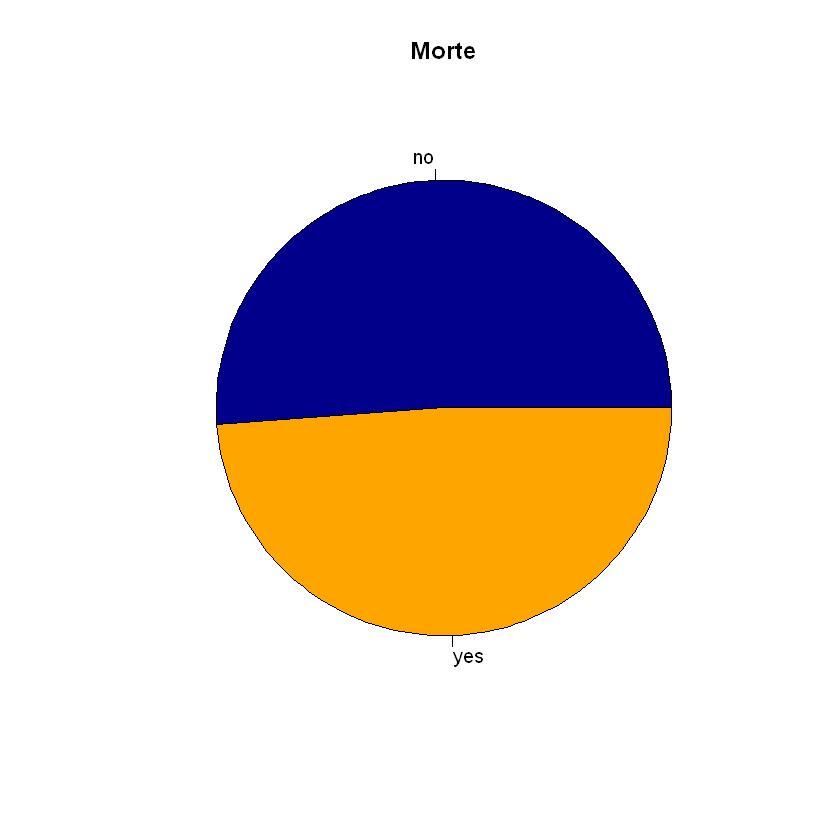

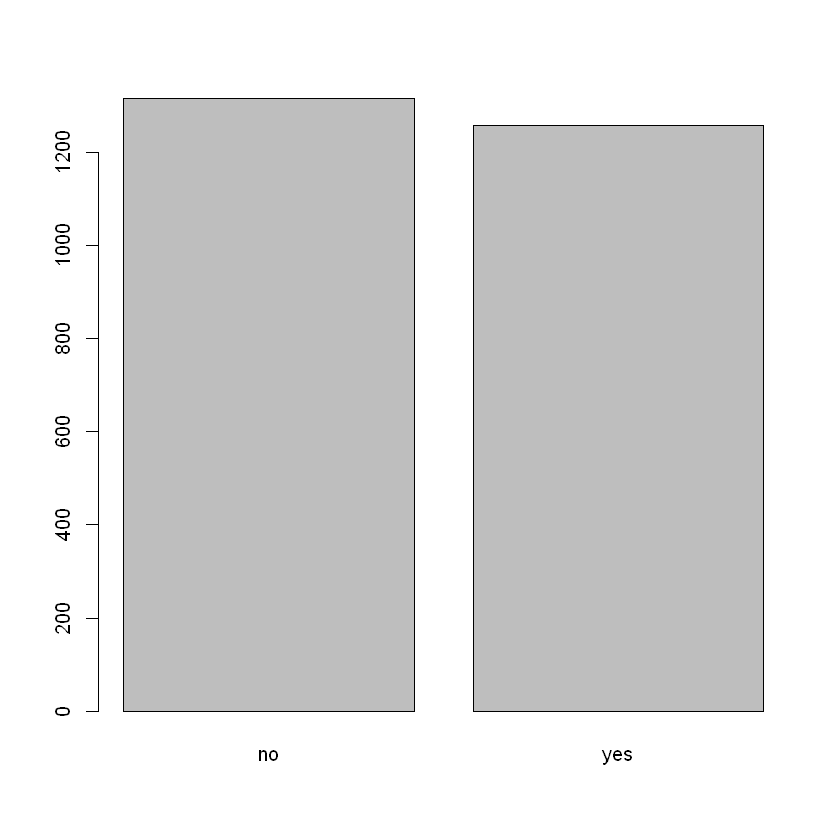

In [6]:
table(Morto)
cols<-c("darkblue","orange")
pie(table(Morto), main="Morte",col=cols)
labs<-c(levels(Morto))
plot(Morto)


Facciamo ora una rapida analisi descrittiva delle altre variabili:

#### -Età

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   37.00   53.00   52.63   69.00  100.00 

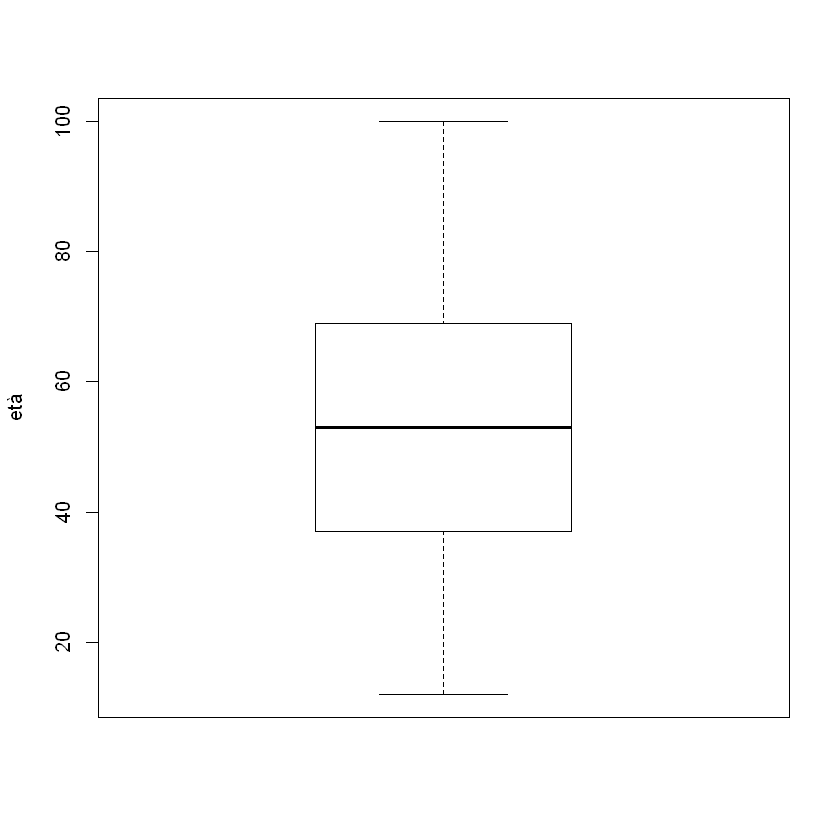

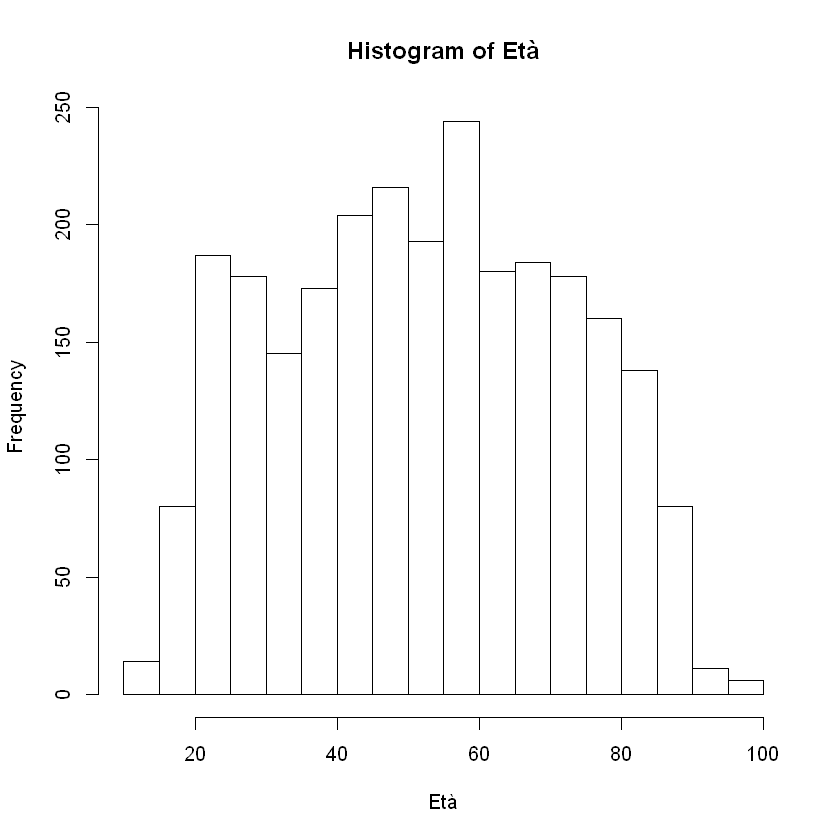

In [7]:
summary(Età)
boxplot(Età, ylab="età")
hist(Età)

In [8]:
#campo di variazione
max(Età) - min(Età) 


[1] 88

In [9]:
#distanza interquartilica
IQR(Età)

[1] 32

In [10]:
#calcolo varianza e deviazione standard
var(Età)
sd(Età)

[1] 391.4018

[1] 19.78388

In [11]:
#moda
getmode(Età)

[1] 40

L’età varia dai 12 anni ai 100 anni e l’età media è 53 anni. Dal box plot e dall’istogramma notiamo che la distribuzione è prettamente simmetrica e che vi è molta dispersione nei dati infatti: la Varianza è di 391.40, lo Standard Error è di circa 19.79 e la differenza tra età minima ed età massima (campo di variazione) è di 88 anni. La Moda della distribuzione, ossia l’età in cui i tentativi di suicidio sono risultati più frequenti è 40 anni.

#### -Educazione

Educazione
iliterate   primary Secondary   unknown 
      533       659      1299        80 

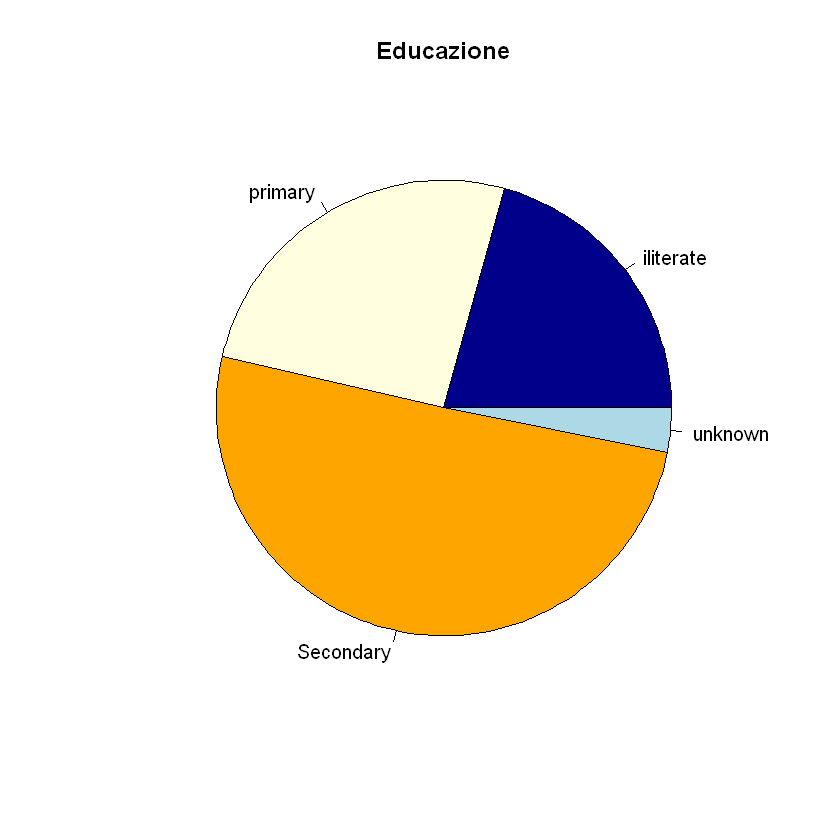

In [12]:
table(Educazione)
cols<-c("darkblue","lightyellow","orange","lightblue")
pie(table(Educazione), main="Educazione", col=cols)


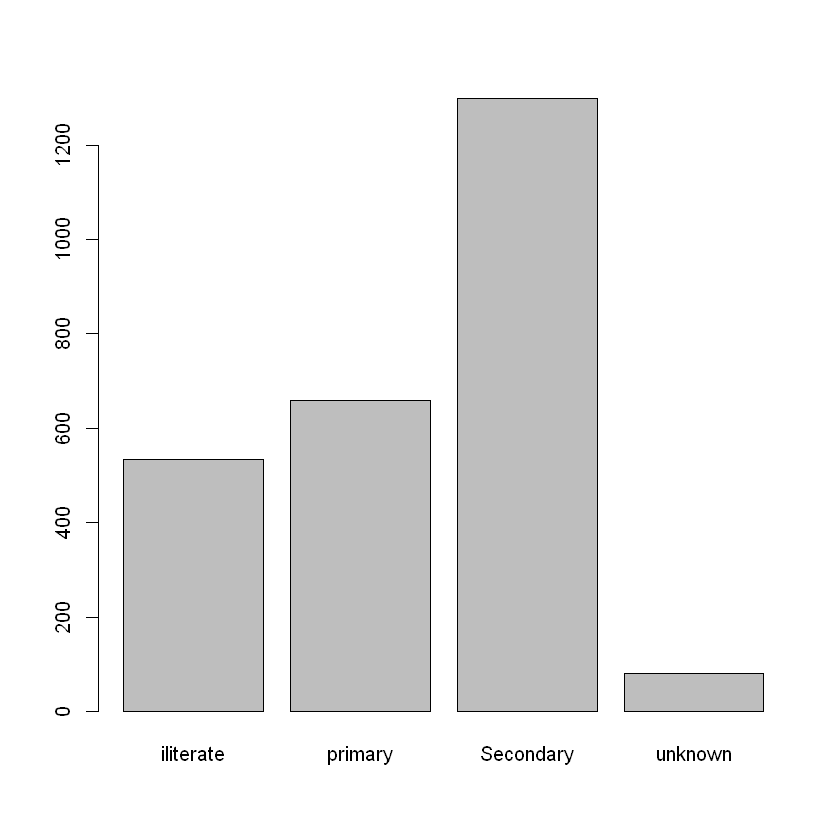

In [13]:
plot(Educazione)

Ben il 51% di coloro che hanno tentato il suicidio ha un livello elevato di istruzione ( “Secondary”) ; potremmo ipotizzare che tali persone tentino il suicidio poiché insoddisfatte del tipo di vita che conducono nel Paese.

#### - Ricoverato

I casi di ricovero sono stati 1553 su 2571 cioè il 60% dei casi studiati.


Ricoverato
  no  yes 
1018 1553 

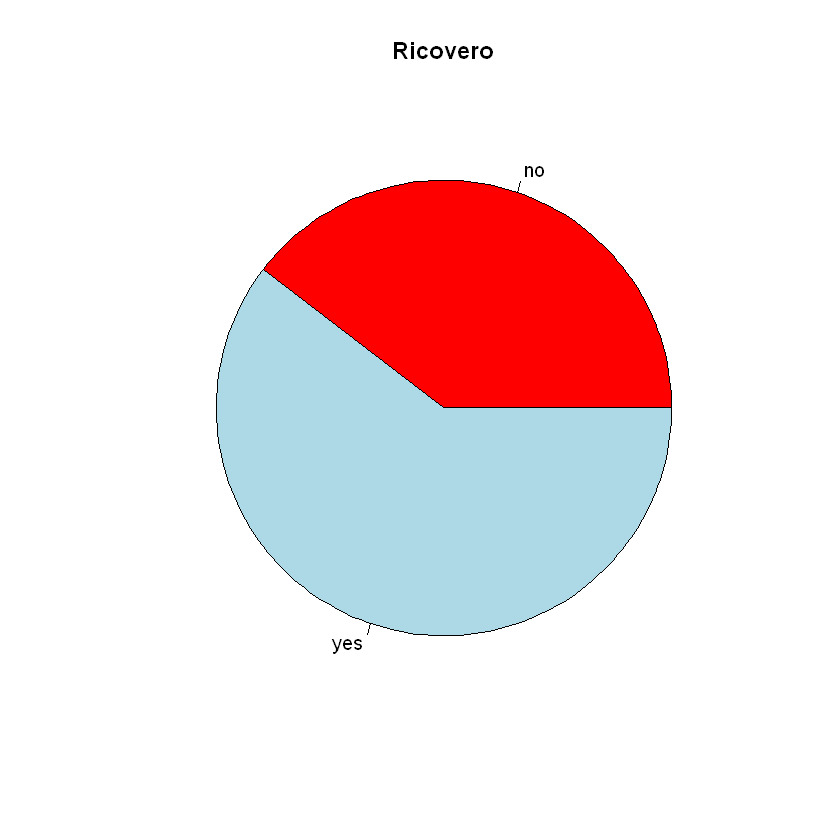

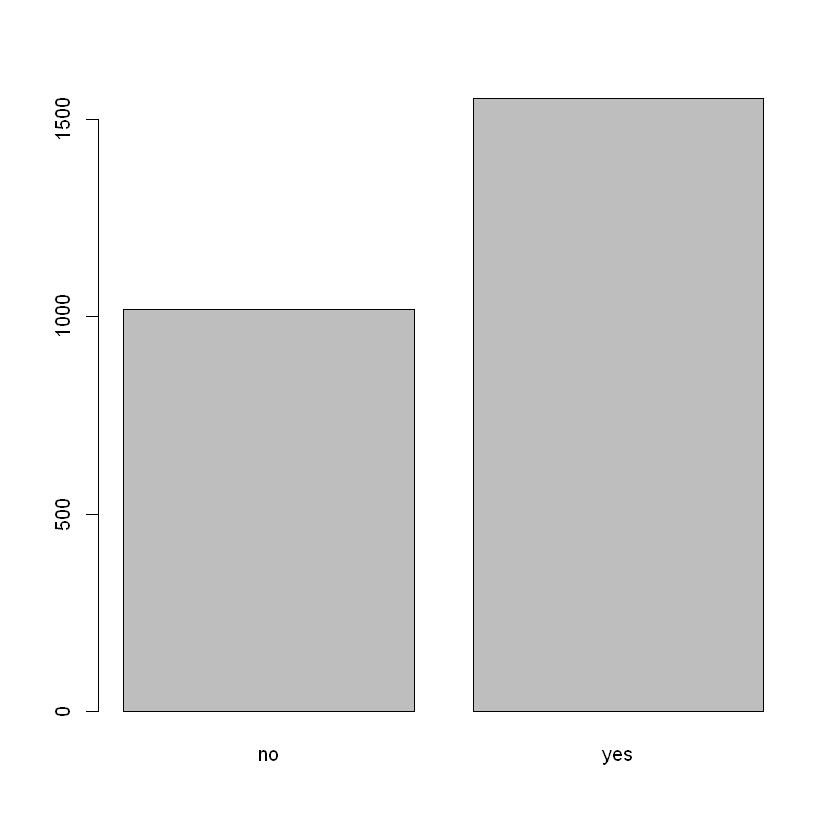

In [14]:
table(Ricoverato)
cols<-c("red","lightblue")
pie(table(Ricoverato), main="Ricovero", col=cols)
plot(Ricoverato)

#### -Metodo

Mostrando la numerosità dei 9 gruppi, notiamo un tasso elevatissimo di tentato suicidio con pesticidi (69%).

Metodo
       Others       Cutting      Drowning       Hanging       Jumping 
            1            29            26           431            15 
 Other poison     Pesticide Poison unspec   unspecified 
          146          1768           107            48 

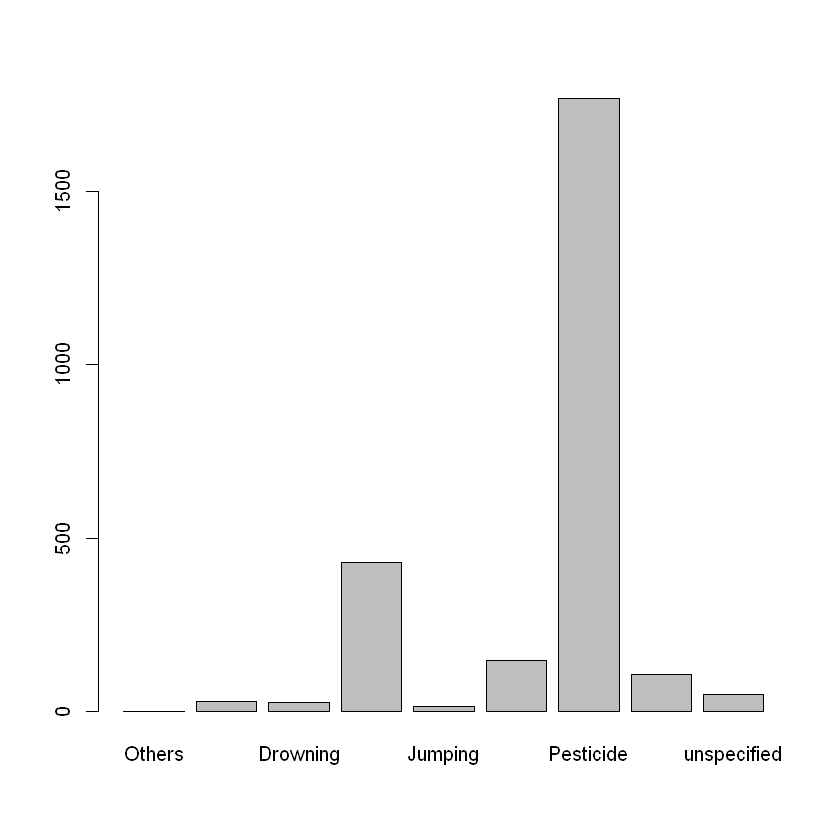

In [15]:
table(Metodo)
plot(Metodo)        

#### -Area Urbana

Come accennato precedentemente, si può notare che soltanto 277 dei tentativi sono stati registrati nelle Aree Urbane di Shandong mentre circa l’89 per cento dei pazienti ha tentato il suicidio in zone Rurali.

Area_Urbana
  no  yes 
2294  277 

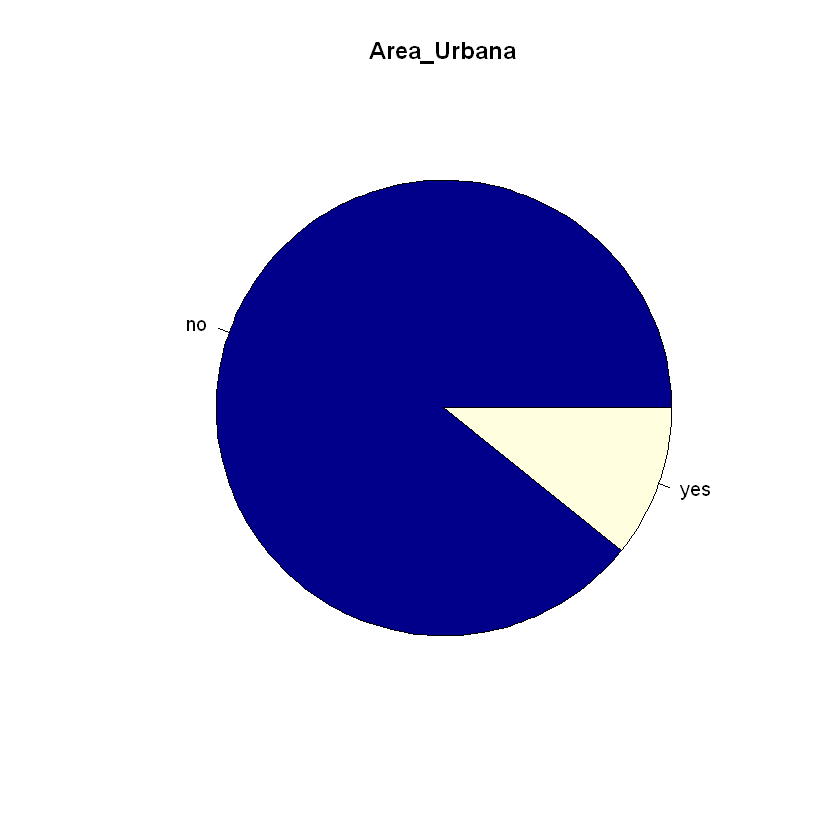

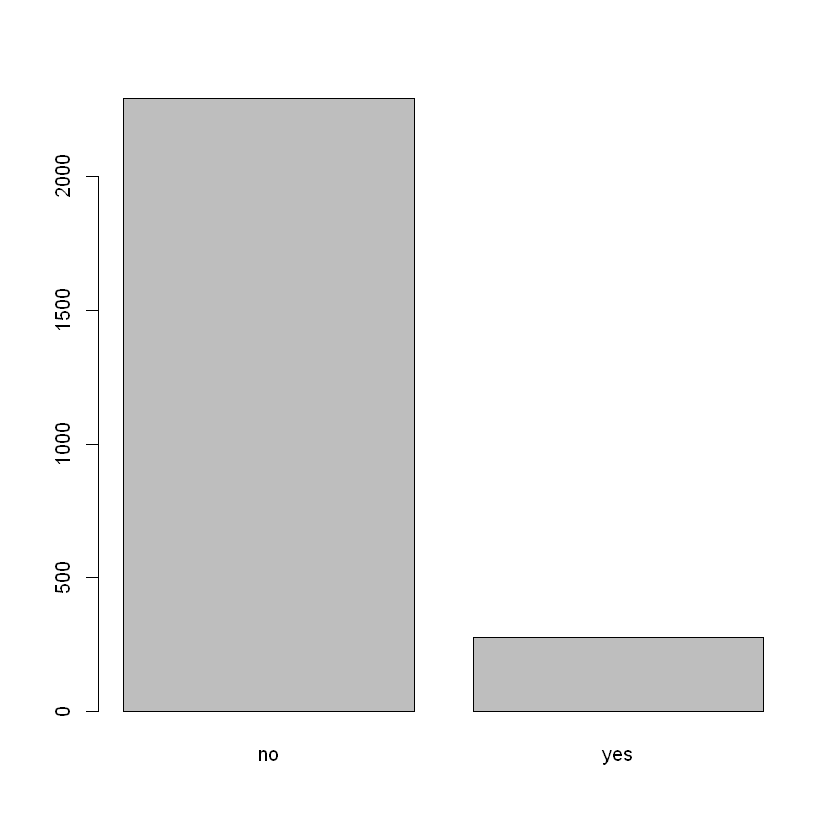

In [16]:
table(Area_Urbana)
cols<-c("darkblue","lightyellow")
pie(table(Area_Urbana), main="Area_Urbana", col=cols)
plot(Area_Urbana)

#### -Occupazione

Mostrando la numerosità dei 9 gruppi, notiamo che la maggior parte di coloro che hanno tentato il suicidio lavora
nel settore agricolo. 

Occupazione
          others business/service          farming        household 
               3               21             2038              248 
  others/unknown     professional          retiree          student 
             156               37                3               35 
      unemployed 
              30 

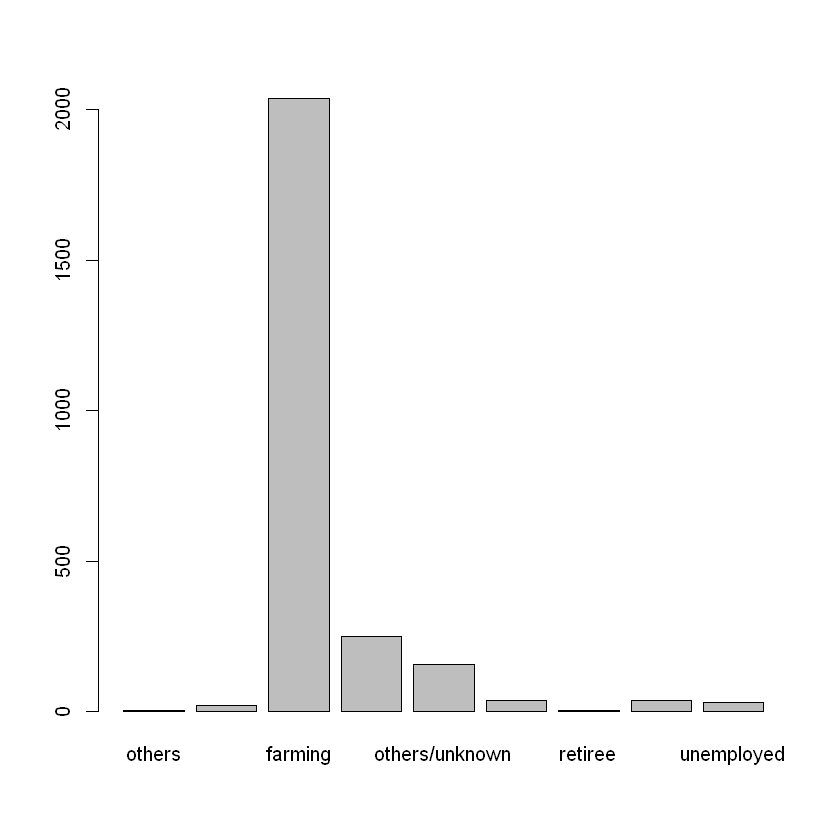

In [17]:
table(Occupazione)
plot(Occupazione)  

#### -Sesso

1328 dei 2571, ossia il 52% dei soggetti che hanno tentato il suicidio è di sesso femminile.         

Sesso
  male female 
  1243   1328 

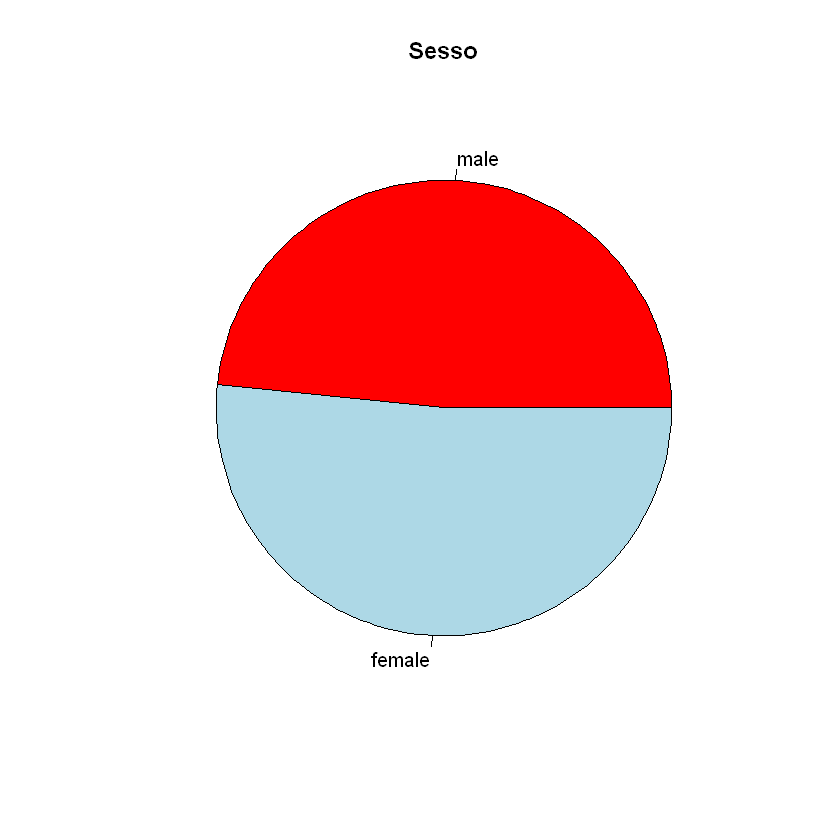

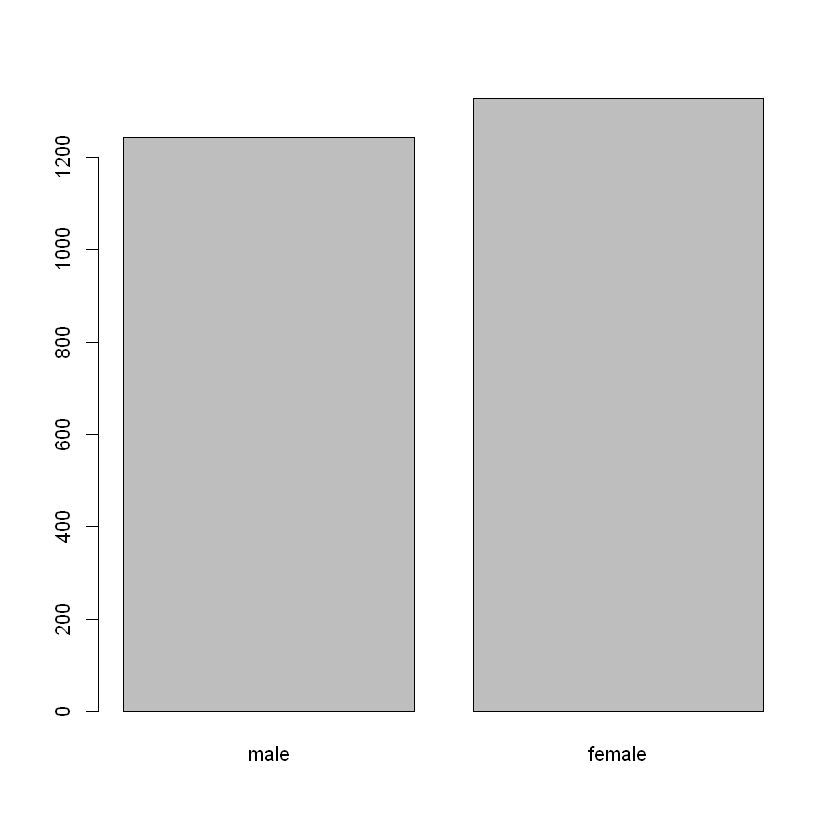

In [18]:
#sesso
table(Sesso)
cols<-c("red","lightblue")
pie(table(Sesso), main="Sesso", col=cols)
plot(Sesso)

Fatte le relative osservazioni sulle variabili, partiamo con la stesura del primo Modello, introducendo come regressori Età e Sesso. 

In [19]:
y<-Morto

#eta e sesso
fit.y.e.s<-glm(y~Età+Sesso,family=binomial(link=logit))
summary(fit.y.e.s)


Call:
glm(formula = y ~ Età + Sesso, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0787  -0.9419  -0.5280   0.9554   2.1073  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.587131   0.146768 -17.627  < 2e-16 ***
Età          0.051390   0.002497  20.582  < 2e-16 ***
Sessofemale -0.340494   0.088243  -3.859 0.000114 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3562.8  on 2570  degrees of freedom
Residual deviance: 3012.1  on 2568  degrees of freedom
AIC: 3018.1

Number of Fisher Scoring iterations: 4


Dall’output notiamo che l’effetto delle variabili, sulla media della risposta (sulla trasformata logit) è statisticamente significativo.



Inserendo nel Modello la variabile “Area Urbana” notiamo che provenire o meno da una zona Urbana non influisce significativamente sulla probabilità di morte.


In [20]:
#+area urbana
fit.y.e.s.a<-glm(y~Età+Sesso+Area_Urbana,family=binomial(link=logit))
summary(fit.y.e.s.a)



Call:
glm(formula = y ~ Età + Sesso + Area_Urbana, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0806  -0.9339  -0.5216   0.9521   2.1009  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.570382   0.148966 -17.255  < 2e-16 ***
Età             0.051254   0.002505  20.463  < 2e-16 ***
Sessofemale    -0.340087   0.088252  -3.854 0.000116 ***
Area_Urbanayes -0.091752   0.143745  -0.638 0.523280    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3562.8  on 2570  degrees of freedom
Residual deviance: 3011.7  on 2567  degrees of freedom
AIC: 3019.7

Number of Fisher Scoring iterations: 4


Aggiungiamo al modello la variabile Ricoverato.

In [21]:
#+ Ricoverato
fit.y.e.s.r<-glm(y~Età+Sesso+Ricoverato,family=binomial(link=logit))
summary(fit.y.e.s.r)


Call:
glm(formula = y ~ Età + Sesso + Ricoverato, family = binomial(link = logit))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.08572  -0.51409  -0.33888   0.00008   2.42874  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    17.714004 327.534709   0.054   0.9569    
Età             0.033519   0.003954   8.476   <2e-16 ***
Sessofemale    -0.262652   0.144870  -1.813   0.0698 .  
Ricoveratoyes -20.950289 327.534646  -0.064   0.9490    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3562.8  on 2570  degrees of freedom
Residual deviance: 1251.2  on 2567  degrees of freedom
AIC: 1259.2

Number of Fisher Scoring iterations: 18


Anche in questo caso, essere stato o meno in stato di ricovero dopo aver tentato il suicidio non influisce significativamente sulla stima della probabilità di morte nel nostro modello.

Aggiungiamo ora la variabile categoriale Metodo. 

In [22]:
fit.y.e.s.m<-glm(y~Età+Sesso+Metodo,family=binomial(link=logit))
summary(fit.y.e.s.m)


Call:
glm(formula = y ~ Età + Sesso + Metodo, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0604  -0.7936  -0.1506   0.8248   3.0850  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.751e+01  1.455e+03  -0.012   0.9904    
Età                  4.743e-02  2.875e-03  16.498   <2e-16 ***
Sessofemale         -1.978e-01  1.003e-01  -1.971   0.0487 *  
MetodoCutting        1.449e+01  1.455e+03   0.010   0.9921    
MetodoDrowning       3.069e+01  1.479e+03   0.021   0.9834    
MetodoHanging        1.825e+01  1.455e+03   0.013   0.9900    
MetodoJumping        1.707e+01  1.455e+03   0.012   0.9906    
MetodoOther poison   1.267e+01  1.455e+03   0.009   0.9931    
MetodoPesticide      1.495e+01  1.455e+03   0.010   0.9918    
MetodoPoison unspec  1.148e+01  1.455e+03   0.008   0.9937    
Metodounspecified    1.228e+01  1.455e+03   0.008   0.9933    
---
Signif. codes:  0 '***' 0.001 '

Inizialmente gli effetti delle categorie della variabile sembrano non risultare statisticamente significative nella stima della probabilità di morte.

In [23]:
anova(fit.y.e.s, fit.y.e.s.m, test="Chisq")  

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2568,3012.130,NA,NA,NA
2,2560,2395.157,8,616.9735,5.244454e-128


Tuttavia da un confronto con il precedente modello, utilizzando il test ChiQuadro Anova, per modelli nested, rifiutiamo l’ipotesi che il modello precedente sia migliore, per tanto non eliminiamo la variabile “Metodo” dal modello.

Al fine di migliorare la significatività delle singole categorie, ricodifichiamo i livelli della variabile aggregando alcune categorie come ad esempio “Other poison” e “Poison unspec” nella nuova categoria “Poison”. Notiamo inoltre che nella categoria “Others” è catalogato un solo caso, perciò decidiamo di aggregarla con la categoria “unspecified” sotto il nome di “Others”. 

In [24]:
#ricodificazione categorie
summary(Metodo)
Metodo<-as.character(Metodo)
Metodo[which(Metodo=="Other poison" | Metodo =="Poison unspec")]<-"Poison"
Metodo<-factor(Metodo, levels=c("Others","Cutting","Drowning","Hanging","Jumping","Poison","Pesticide","unspecified"),labels=c("Others","Cutting","Drowning","Hanging","Jumping","Poison","Pesticide","unspecified"))
levels(Metodo)
summary(Metodo)

Metodo<-as.character(Metodo)
Metodo[which(Metodo=="unspecified")] <-"Others"
Metodo<-factor(Metodo, levels=c("Others","Pesticide","Cutting","Drowning","Hanging","Jumping","Poison"),labels=c("Others","Pesticide","Cutting","Drowning","Hanging","Jumping","Poison"))
levels(Metodo)
summary(Metodo)

Others       Cutting      Drowning       Hanging       Jumping 
            1            29            26           431            15 
 Other poison     Pesticide Poison unspec   unspecified 
          146          1768           107            48

[1] "Others"      "Cutting"     "Drowning"    "Hanging"     "Jumping"    
[6] "Poison"      "Pesticide"   "unspecified"

Others     Cutting    Drowning     Hanging     Jumping      Poison 
          1          29          26         431          15         253 
  Pesticide unspecified 
       1768          48

[1] "Others"    "Pesticide" "Cutting"   "Drowning"  "Hanging"   "Jumping"  
[7] "Poison"

Others Pesticide   Cutting  Drowning   Hanging   Jumping    Poison 
       49      1768        29        26       431        15       253

Fittando di nuovo il modello con la variabile categoriale Metodo ricodificata notiamo un miglioramento di quest’ultimo sul piano della significatività delle singole categorie.

In [25]:
fit.y.e.s.m<-glm(y~Età+Sesso+Metodo,family=binomial(link=logit))
summary(fit.y.e.s.m)


Call:
glm(formula = y ~ Età + Sesso + Metodo, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0617  -0.7906  -0.1732   0.8241   2.9638  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -5.255618   0.639167  -8.223  < 2e-16 ***
Età               0.047634   0.002876  16.560  < 2e-16 ***
Sessofemale      -0.193614   0.100273  -1.931  0.05350 .  
MetodoPesticide   2.683905   0.616148   4.356 1.32e-05 ***
MetodoCutting     2.226646   0.765122   2.910  0.00361 ** 
MetodoDrowning   18.420831 261.373783   0.070  0.94381    
MetodoHanging     5.979751   0.681477   8.775  < 2e-16 ***
MetodoJumping     4.806062   0.919259   5.228 1.71e-07 ***
MetodoPoison      0.066110   0.663617   0.100  0.92065    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3562.8  on 2570  degrees of freedom
Residual deviance: 2

Al fine di garantire la parsimonia e di rendere significativo l’effetto di tutte le singole categorie della variabile statisticamente significativo nella stima del modello, aggreghiamo la categoria “Poison” e la Categoria “Pesticide”, poiché entrambe sono causa di avvelenamento. (Poisoning”);  le categorie Drowining (Annegamento) e "Hanging" ( Impiccagione ) nella nuova categoria “Chocking” (Soffocamento),  in quanto entrambi i metodi sono causa di morte per vie respiratorie; e le categorie “ Cutting” e “Jumping” nella nuova categoria “Physical Injury”.

[1] "Others"    "Poisoning" "Cutting"   "Drowning"  "Hanging"   "Jumping"

Others Poisoning   Cutting  Drowning   Hanging   Jumping 
       49      2021        29        26       431        15

[1] "Others"    "Poisoning" "Cutting"   "Choking"   "Jumping"

Others Poisoning   Cutting   Choking   Jumping 
       49      2021        29       457        15

[1] "Others"          "Poisoning"       "Choking"         "Physical_Injury"

Others       Poisoning         Choking Physical_Injury 
             49            2021             457              44

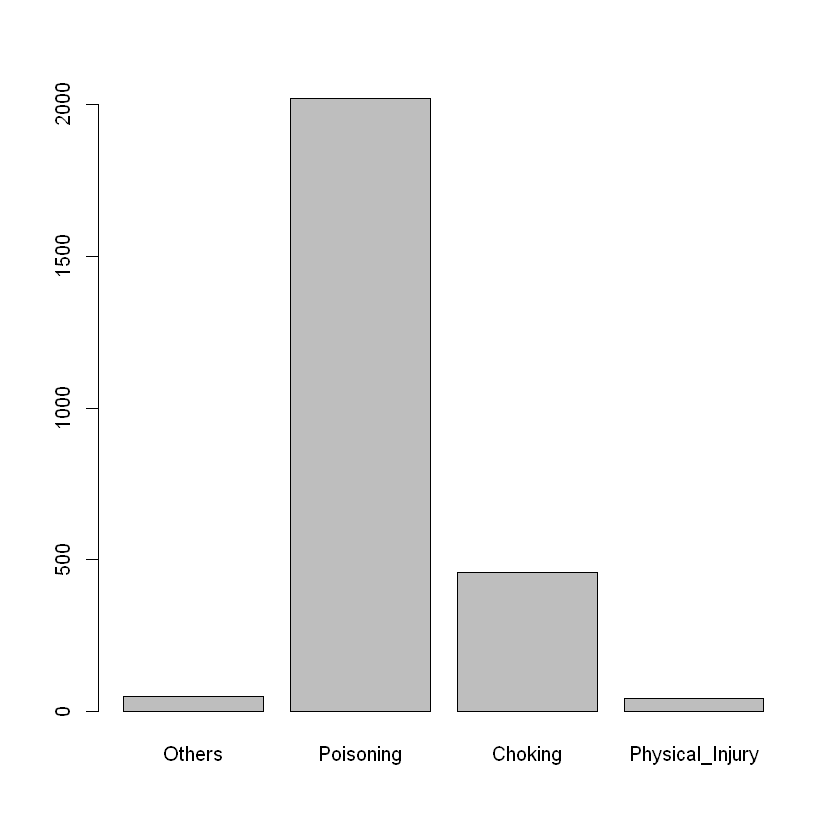

In [26]:
#ulteriore ricodificazione ( Pesticide e Poison sono causa di avvelenamento "Poisoning")
Metodo<-as.character(Metodo)
Metodo[which(Metodo=="Pesticide" | Metodo=="Poison")] <-"Poisoning"
Metodo<-factor(Metodo, levels=c("Others","Poisoning","Cutting","Drowning","Hanging","Jumping"),labels=c("Others","Poisoning","Cutting","Drowning","Hanging","Jumping"))
levels(Metodo)
summary(Metodo)
Metodo<-as.character(Metodo)
Metodo[which(Metodo=="Hanging" | Metodo=="Drowning")] <-"Choking"
Metodo<-factor(Metodo, levels=c("Others","Poisoning","Cutting","Choking","Jumping"),labels=c("Others","Poisoning","Cutting","Choking","Jumping"))
levels(Metodo)
summary(Metodo)
Metodo<-as.character(Metodo)
Metodo[which(Metodo=="Cutting" | Metodo=="Jumping")] <-"Physical_Injury"
Metodo<-factor(Metodo, levels=c("Others","Poisoning","Choking","Physical_Injury"),labels=c("Others","Poisoning","Choking","Physical_Injury"))
levels(Metodo)
summary(Metodo)
plot(Metodo)

In [27]:
fit.y.e.s.m<-glm(y~Età+Sesso+Metodo,family=binomial(link=logit))
summary(fit.y.e.s.m)


Call:
glm(formula = y ~ Età + Sesso + Metodo, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0661  -0.8317  -0.3361   0.9352   2.3050  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -4.993676   0.632164  -7.899 2.80e-15 ***
Età                    0.043659   0.002699  16.177  < 2e-16 ***
Sessofemale           -0.253196   0.095932  -2.639  0.00831 ** 
MetodoPoisoning        2.442029   0.612682   3.986 6.73e-05 ***
MetodoChoking          6.061453   0.678275   8.937  < 2e-16 ***
MetodoPhysical_Injury  3.044718   0.693628   4.390 1.14e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3562.8  on 2570  degrees of freedom
Residual deviance: 2584.5  on 2565  degrees of freedom
AIC: 2596.5

Number of Fisher Scoring iterations: 6


Tutte le categorie della variabile Metodo mostrano ora un effetto significativo sulla media della risposta.

Inseriamo ora nel modello la variabile categoriale “Occupazione”.

In [28]:
fit.y.e.s.m.o<-glm(y~Età+Sesso+Metodo+Occupazione,family=binomial(link=logit))
summary(fit.y.e.s.m.o)
anova(fit.y.e.s.m, fit.y.e.s.m.o, test="Chisq")


Call:
glm(formula = y ~ Età + Sesso + Metodo + Occupazione, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1755  -0.8098  -0.1767   0.8577   2.8398  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   9.025727 441.346345   0.020    0.984    
Età                           0.046268   0.002921  15.838  < 2e-16 ***
Sessofemale                  -0.137129   0.100780  -1.361    0.174    
MetodoPoisoning               2.539340   0.619506   4.099 4.15e-05 ***
MetodoChoking                 6.302192   0.694395   9.076  < 2e-16 ***
MetodoPhysical_Injury         3.091635   0.708625   4.363 1.28e-05 ***
Occupazionebusiness/service -13.763214 441.346189  -0.031    0.975    
Occupazionefarming          -14.132831 441.345889  -0.032    0.974    
Occupazionehousehold        -15.181331 441.345928  -0.034    0.973    
Occupazioneothers/unknown   -16.828625 441.346031  -0.038    0.970 

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2565,2584.510,NA,NA,NA
2,2557,2428.942,8,155.5677,1.349828e-29


Anche in questo caso, inizialmente l’effetto delle singole categorie della variabile sembrano non essere statisticamete significative per la stima della probabilità di morte. Effettuando il test ChiQuadro Anova però si capisce che è giusto inserire la variabile nel modello. Come fatto prima, aggreghiamo alcune categorie per rendere il modello più parsimonioso e l’effetto delle categorie sulla media della risposta statisticamente significativo.

Aggreghiamo le categorie “Others”, ” Others/unknown” e la categoria “retiree” rappresentata da soli 3 casi, nella categoria “others”.

others business/service          farming        household 
               3               21             2038              248 
  others/unknown     professional          retiree          student 
             156               37                3               35 
      unemployed 
              30

others business/service          farming        household 
             159               21             2038              248 
    professional          retiree          student       unemployed 
              37                3               35               30

others business/service          farming        household 
             162               21             2038              248 
    professional          student       unemployed 
              37               35               30

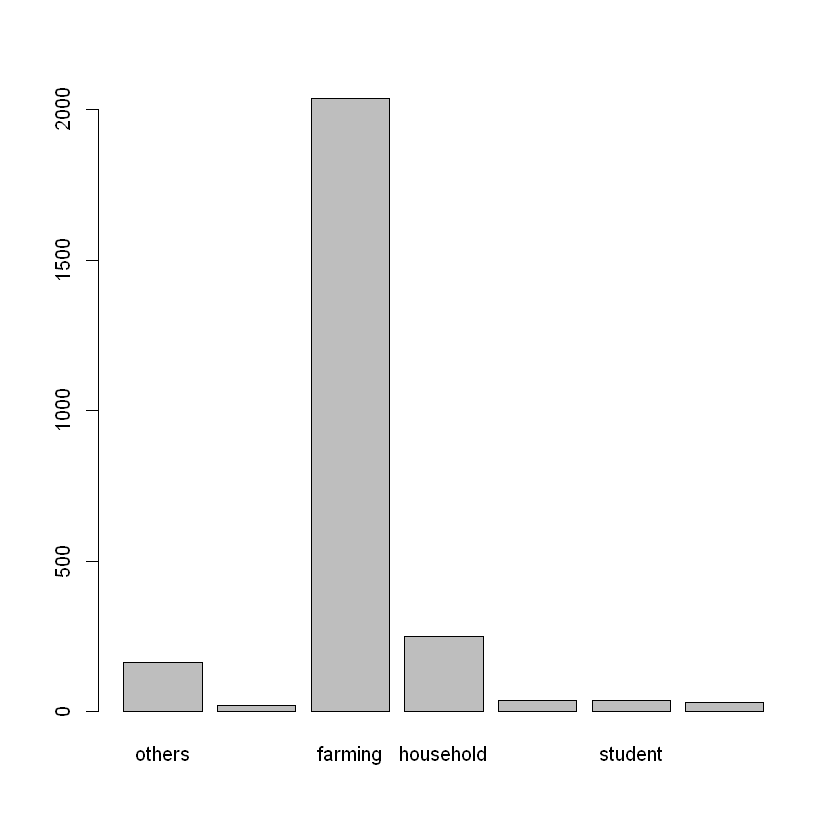

In [29]:
summary(Occupazione)
Occupazione<-as.character(Occupazione)
Occupazione[which(Occupazione=="others/unknown")] <-"others"
Occupazione<-factor(Occupazione, levels=c("others" ,"business/service","farming","household","professional","retiree","student","unemployed"), labels=c("others" ,"business/service","farming","household","professional","retiree","student","unemployed"))
summary(Occupazione)

Occupazione<-as.character(Occupazione)
Occupazione[which(Occupazione=="retiree")] <-"others"
Occupazione<-factor(Occupazione, levels=c("others" ,"business/service","farming","household","professional","student","unemployed"), labels=c("others" ,"business/service","farming","household","professional","student","unemployed"))
summary(Occupazione)

plot(Occupazione)

In [30]:
fit.y.e.s.m.o<-glm(y~Età+Sesso+Metodo+Occupazione,family=binomial(link=logit))
summary(fit.y.e.s.m.o)


Call:
glm(formula = y ~ Età + Sesso + Metodo + Occupazione, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1569  -0.8131  -0.1932   0.8571   2.7878  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -7.647655   0.727492 -10.512  < 2e-16 ***
Età                          0.046039   0.002911  15.817  < 2e-16 ***
Sessofemale                 -0.152643   0.100465  -1.519 0.128670    
MetodoPoisoning              2.539519   0.619272   4.101 4.12e-05 ***
MetodoChoking                6.242894   0.688663   9.065  < 2e-16 ***
MetodoPhysical_Injury        3.190452   0.706633   4.515 6.33e-06 ***
Occupazionebusiness/service  2.926950   0.613787   4.769 1.85e-06 ***
Occupazionefarming           2.559662   0.330755   7.739 1.00e-14 ***
Occupazionehousehold         1.519611   0.371950   4.086 4.40e-05 ***
Occupazioneprofessional      3.755173   0.523579   7.172 7.38e-13 ***
Occupaz

Così facendo, abbiamo un netto miglioramento del modello. 

Aggiungiamo ora il regressore Educazione. 

In [31]:
fit.y.e.s.m.o.e<-glm(y~Età+Sesso+Metodo+Occupazione+Educazione,family=binomial(link=logit))
summary(fit.y.e.s.m.o.e)
anova(fit.y.e.s.m.o, fit.y.e.s.m.o.e, test="Chisq")



Call:
glm(formula = y ~ Età + Sesso + Metodo + Occupazione + Educazione, 
    family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3428  -0.6909  -0.2158   0.6588   2.6734  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -4.217467   0.805435  -5.236 1.64e-07 ***
Età                          0.016527   0.003591   4.603 4.17e-06 ***
Sessofemale                 -0.269342   0.108074  -2.492 0.012696 *  
MetodoPoisoning              2.508290   0.633920   3.957 7.60e-05 ***
MetodoChoking                6.244373   0.704192   8.867  < 2e-16 ***
MetodoPhysical_Injury        3.191203   0.730113   4.371 1.24e-05 ***
Occupazionebusiness/service  2.580195   0.673685   3.830 0.000128 ***
Occupazionefarming           2.184572   0.400947   5.449 5.08e-08 ***
Occupazionehousehold         1.019224   0.437905   2.327 0.019939 *  
Occupazioneprofessional      3.780822   0.562800   6.718 1.

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2559,2444.367,NA,NA,NA
2,2556,2209.286,3,235.0815,1.101764e-50


Tutte le categorie della variabile “Educazione” risultano avere un effetto statisticamente significativo sulla risposta.
Un’ulteriore conferma è data dal test Anova


Ecco dunque il nostro modello_finale: “y~Età+Sesso+Metodo+Occupazione+Educazione”

In [32]:
(modello_finale<-fit.y.e.s.m.o.e)


Call:  glm(formula = y ~ Età + Sesso + Metodo + Occupazione + Educazione, 
    family = binomial(link = logit))

Coefficients:
                (Intercept)                          Età  
                   -4.21747                      0.01653  
                Sessofemale              MetodoPoisoning  
                   -0.26934                      2.50829  
              MetodoChoking        MetodoPhysical_Injury  
                    6.24437                      3.19120  
Occupazionebusiness/service           Occupazionefarming  
                    2.58020                      2.18457  
       Occupazionehousehold      Occupazioneprofessional  
                    1.01922                      3.78082  
         Occupazionestudent        Occupazioneunemployed  
                    2.29355                      1.91483  
          Educazioneprimary          EducazioneSecondary  
                   -0.69092                     -2.28212  
          Educazioneunknown  
                

Tra tutte le possibili interazioni tra variabili, quella statisticamente più significativa nella spiegazione della risposta, è quella tra “Area Urbana” ed “Età” tuttavia per introdurla nel modello dovremmo ammettere un livello di significatività maggiore del 10%.

In [33]:
prova<-glm(y~Età+Sesso*Area_Urbana+Metodo+Occupazione+Educazione,family=binomial(link=logit))
summary(prova)


Call:
glm(formula = y ~ Età + Sesso * Area_Urbana + Metodo + Occupazione + 
    Educazione, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3268  -0.6848  -0.2071   0.6565   2.6292  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -4.328322   0.808993  -5.350 8.78e-08 ***
Età                          0.016702   0.003595   4.646 3.38e-06 ***
Sessofemale                 -0.212433   0.114152  -1.861 0.062749 .  
Area_Urbanayes               0.541106   0.254414   2.127 0.033431 *  
MetodoPoisoning              2.489538   0.634052   3.926 8.62e-05 ***
MetodoChoking                6.212250   0.703870   8.826  < 2e-16 ***
MetodoPhysical_Injury        3.111688   0.730106   4.262 2.03e-05 ***
Occupazionebusiness/service  2.588276   0.679489   3.809 0.000139 ***
Occupazionefarming           2.259581   0.406063   5.565 2.63e-08 ***
Occupazionehousehold         1.085893   0.442

Andiamo ora a mostrare i gruppi formati dai singoli regressori facenti parte del modello finale, e la risposta:

     Metodo
Morto Others Poisoning Choking Physical_Injury
  no      46      1233      12              24
  yes      3       788     445              20

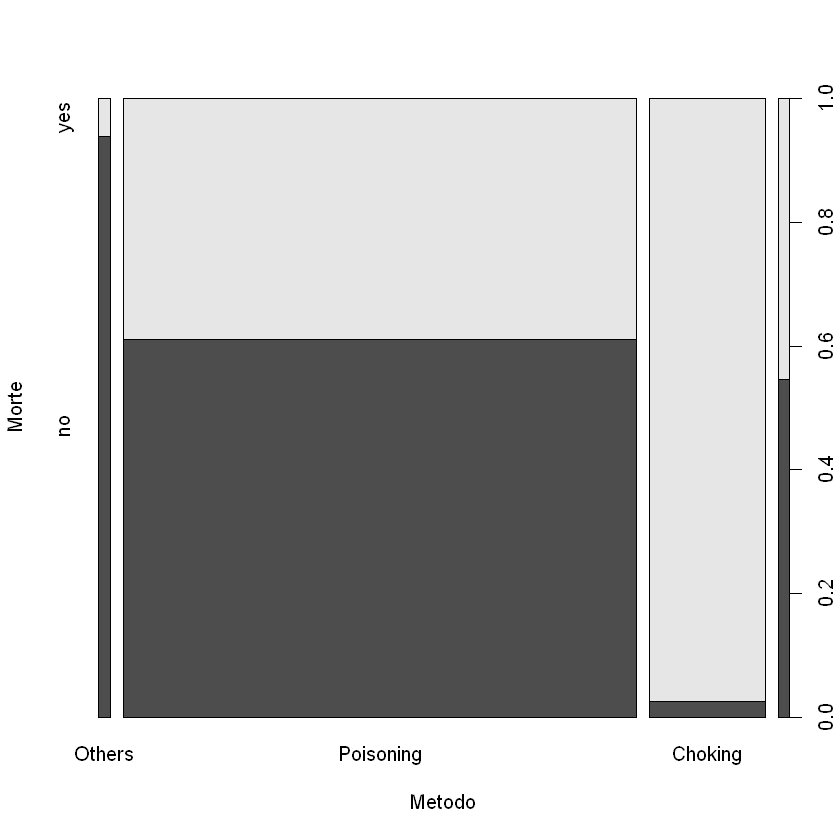

In [34]:
#metodo:
table(Morto, Metodo)
plot(Metodo, Morto, pch = 16, xlab = "Metodo", ylab = "Morte")

     Sesso
Morto male female
  no   574    741
  yes  669    587

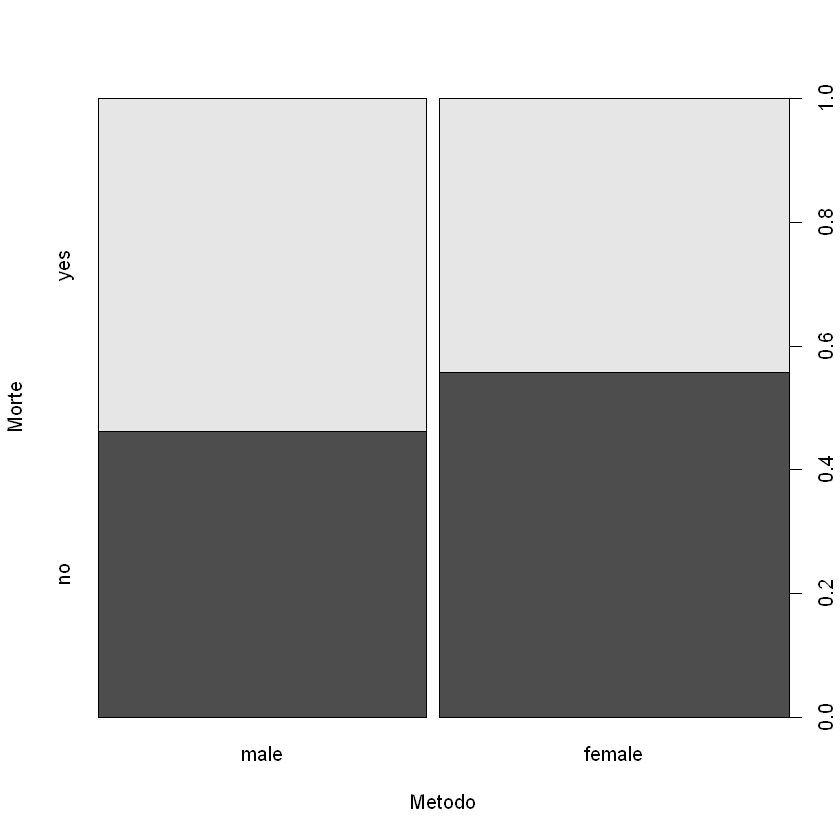

In [35]:

#Sesso:
table(Morto,Sesso)
plot(Sesso, Morto, pch = 16, xlab = "Metodo", ylab = "Morte")


     Occupazione
Morto others business/service farming household professional student unemployed
  no     149               12     939       154           11      27         23
  yes     13                9    1099        94           26       8          7

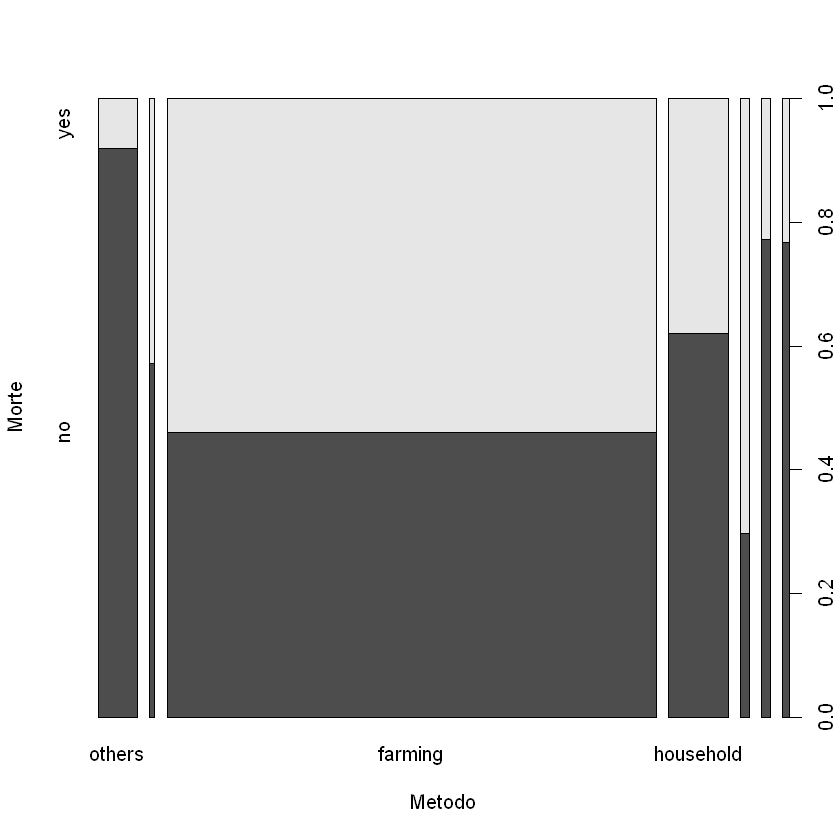

In [36]:
#Occupazione:
table(Morto, Occupazione)
plot(Occupazione, Morto, xlab = "Metodo", ylab = "Morte")

     Educazione
Morto iliterate primary Secondary unknown
  no         80     191       975      69
  yes       453     468       324      11

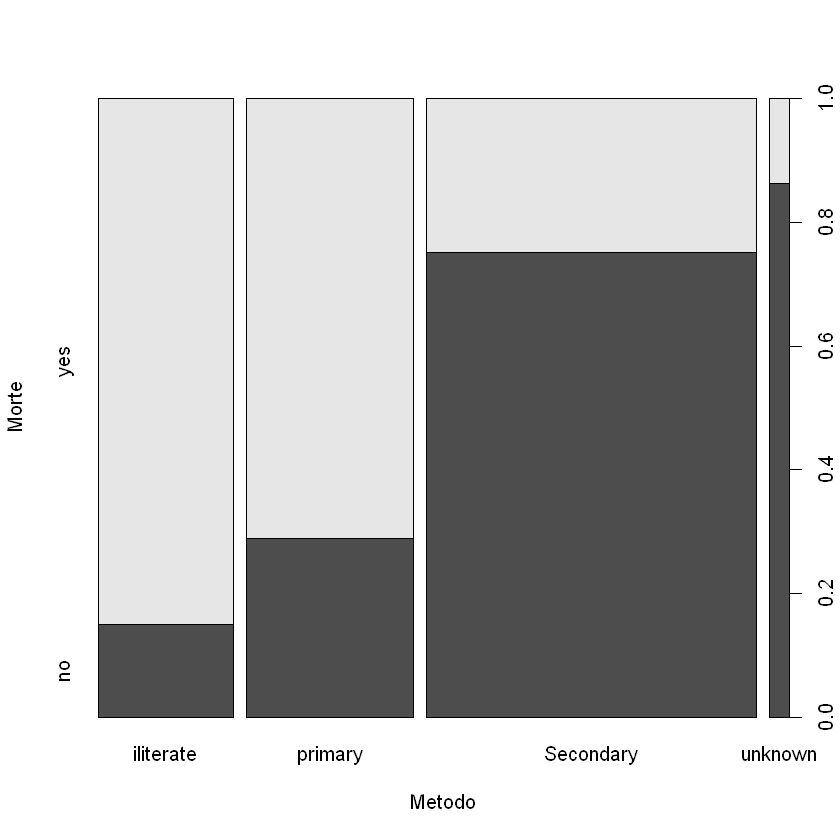

In [37]:
#Educazione
table(Morto, Educazione)
plot(Educazione, Morto, pch = 16, xlab = "Metodo", ylab = "Morte")

Mostrando le realizzazioni congiunte delle variabili: “Occupazione” e “Metodo”, notiamo che un alto tasso di persone che ha un grado di educazione alto possiede un lavoro domestico o lavora nel campo agricolo e questo fortifica la precedente teoria riguardante il grado di insoddisfazione di questa categoria di persone.

In [38]:
table(Educazione, Occupazione)

           Occupazione
Educazione  others business/service farming household professional student
  iliterate      6                1     477        49            0       0
  primary       10                4     557        81            4       3
  Secondary     75               16     998       117           33      32
  unknown       71                0       6         1            0       0
           Occupazione
Educazione  unemployed
  iliterate          0
  primary            0
  Secondary         28
  unknown            2

## VALIDAZIONE DEL MODELLO

Facciamo ora un’analisi critica dei risultati ottenuti dal nostro modello cercando di capire, se i valori stimati si avvicinano a quelli che sono stati effettivamente osservati.

Procediamo con la costruzione della tabella di corretta classificazione considerando come soglia critica tra “morte” e “sopravvivenza” la probabilità di 0.5  (>0.5 Y=YES;  <0.5 Y=NO )


In [39]:
tab <- table(y, modello_finale$fitted >.5)                     
tab

     
y     FALSE TRUE
  no   1090  225
  yes   264  992

In [40]:
sum(diag(tab))/sum(tab) # percentuale di corretta classificazione

[1] 0.8098016

La percentuale di corretta classificazione del modello costruito è 81%.

###### Residui

I residui variano da un massimo di 2.67 ad un minimo di -3,34; i valori stimati quindi non si discostano molto da quelli osservati. Ulteriore conferma della bontà del modello è data dal seguente grafico, in cui notiamo che i residui si distribuiscono erraticamente intorno allo 0  non mostrando alcun trend.

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.34275 -0.69092 -0.21580 -0.02465  0.65877  2.67340 

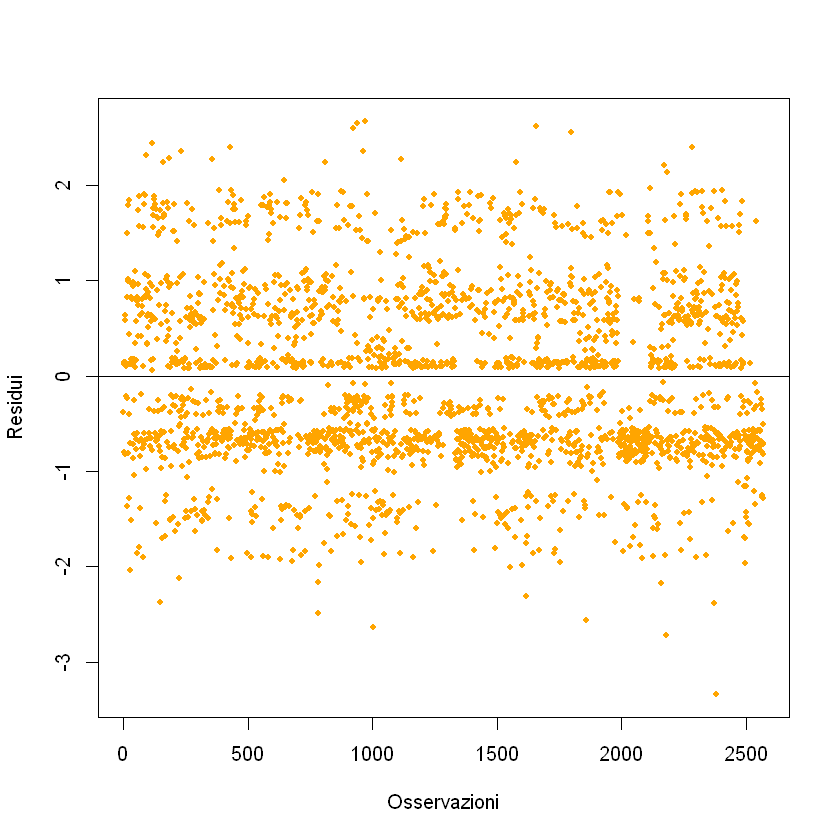

In [41]:
summary(residuals.glm(modello_finale))
plot(residuals.glm(modello_finale), col="orange", pch=20, xlab="Osservazioni", ylab="Residui")
abline(h=0)

Infine, il p-value elevato del test di Hosmer-Lemeshow, ci conferma la bontà di adattamento del nostro modello ai dati.

In [42]:
library(generalhoslem)
hl<-logitgof(modello_finale$y, fitted(modello_finale))
hl

Warning message:
"package 'generalhoslem' was built under R version 3.6.2"Loading required package: reshape
Warning message:
"package 'reshape' was built under R version 3.6.2"Loading required package: MASS



	Hosmer and Lemeshow test (binary model)

data:  modello_finale$y, fitted(modello_finale)
X-squared = 3.9949, df = 8, p-value = 0.8576


### Analisi dei Risultati
Una volta validata la bontà del modello, mostriamo in tabella le stime e gli intervalli di confidenza per i parametri e dell’effetto dei regressori associati ad essi, sulla probabilità di morire in seguito ad un tentativo di suicidio.

In [43]:
#intervalli di confidenza per i parametri B ,e per exp(B)
ICB<-confint(modello_finale)
ICexpB<-exp(confint(modello_finale))
stim<-cbind(modello_finale$coefficients,ICB, exp(modello_finale$coefficients),  ICexpB)
stim<-rbind(c("Parametri","IC lower","IC upper","Exp(Parametri)","IC lower","IC upper"),stim)
stim

Waiting for profiling to be done...
Waiting for profiling to be done...


,,2.5 %,97.5 %,,2.5 %,97.5 %
,Parametri,IC lower,IC upper,Exp(Parametri),IC lower,IC upper
(Intercept),-4.21746661502228,-5.95363795136122,-2.74009382172736,0.0147359290381804,0.00259637782020165,0.0645642890758689
Età,0.0165273954875841,0.00949374586595065,0.0235771753520945,1.01666472843049,1.00953895442416,1.02385731424636
Sessofemale,-0.269341814397309,-0.481581387439387,-0.0577648495342755,0.76388210511686,0.617805628837441,0.943871873253376
MetodoPoisoning,2.50828955826753,1.40885091360284,3.97639703560277,12.2839011840806,4.09125150054633,53.3245612034638
MetodoChoking,6.24437344393186,4.99029720618149,7.8200056543709,515.106380768821,146.980100399245,2489.91948693309
MetodoPhysical_Injury,3.19120300725477,1.8636300056161,4.79913864224882,24.3176641799928,6.44709734584217,121.405798642365
Occupazionebusiness/service,2.58019502138277,1.24780581863546,3.90534355898772,13.1997121347728,3.4826929078561,49.6671405738762
Occupazionefarming,2.18457177449727,1.44265760686533,3.02356939158733,8.88684216597926,4.23192768551093,20.5645638190199
Occupazionehousehold,1.01922374277716,0.195189996621145,1.92116941106818,2.77104288681159,1.21554191340778,6.82893963934512


Commentiamo ora l’effetto di alcuni regressori sulla probabilità di morte:



-Età:      

La probabilità di morire, piuttosto che sopravvivere per i pazienti che hanno un anno in più è almeno lo 0.95% e al più il 2.38% in più dell’analoga probabilità per i pazienti che hanno un anno in meno.



-Sesso:

La propensione a morire, per le donne che hanno tentato il suicidio è almeno 0.61 ed al più 0.94 volte l’analoga propensione per gli uomini.



-Metodo:

La probabilità di morire, piuttosto che sopravvivere per i pazienti che hanno tentato il suicidio tramite un metodo di soffocamento è più di 500 volte superiore all’analoga probabilità per i pazienti che hanno utilizzato altri metodi.


La propensione a morire, per coloro che hanno tentato il suicidio tramite lesioni fisiche è circa il doppio più elevata (exp(3.191-2.508)) dell’analoga propensione per coloro che hanno tentato il suicidio tramite metodi legati all’avvelenamento.



-Occupazione:

L’odds riferito alla morte del paziente che ha tentato il suicidio e possiede un’occupazione nel settore agricolo è il 33% inferiore dell’analogo odds per i pazienti che lavorano nel settore del business e dei servizi



-Educazione:

La probabilità di morire, piuttosto che sopravvivere per i pazienti che possiedono una educazione elevata (“Secondary”) è minimo 0.07 e massimo 0.14 l’analoga probabilità per i pazienti che sono analfabeti.


#### USO DEL MODELLO: 

Utilizziamo ora il nostro modello con 5 profili di unità per stimarne la probabilità di morte. Di seguito, per ogni probabilità stimata appare il suo Intervallo di Confidenza costruito attraverso l’utilizzo della funzione "funzione_IC_Pigreco".

In [44]:
funzione_IC_Pigreco<-function(x) {
  se<-x$se.fit
  x<-x$fit
  #se<-as.numeric(se)
  #x<-as.numeric(x)
  low=x-(1.96*se)
  upp=x+(1.96*se)
  ic=c(low,upp)
  return(ic)
}

Primo profilo:
“Età=20, Sesso=”female”, Metodo="Poisoning", Occupazione = "student", Educazione="primary"



In [45]:
p1<-predict.glm(modello_finale,type= "response",newdata = data.frame(Età=20,Sesso="female",Metodo="Poisoning", Occupazione = "student", Educazione="primary"),se.fit=T)
p1$fit
funzione_IC_Pigreco(p1)

1 
0.4886656

1         1 
0.2659900 0.7113411

Secondo profilo:
(creato modificando la variabile sesso rispetto al primo)
( Età=20 ,Sesso="male", Metodo="Poisoning", Occupazione = "student", Educazione="primary" ) 


In [46]:
p2<-predict.glm(modello_finale,type= "response",newdata = data.frame(Età=20,Sesso="male",Metodo="Poisoning", Occupazione = "student", Educazione="primary"),se.fit=T)
p2$fit
funzione_IC_Pigreco(p2)

1 
0.5557661

1         1 
0.3364191 0.7751132

Notiamo,  che a parità di condizioni la probabilità di morire è maggiore per un uomo rispetto ad una donna. 

Terzo profilo:
 ( Età=20, Sesso="female", Metodo="Choking", Occupazione = "household", Educazione="iliterate" )


In [47]:
p3<-predict.glm(modello_finale,type= "response",newdata = data.frame(Età=20,Sesso="female",Metodo="Choking", Occupazione = "household", Educazione="iliterate"),se.fit=T)
p3$fit
funzione_IC_Pigreco(p3)

1 
0.9571944

1         1 
0.9243134 0.9900753

Quarto profilo:
( Età=20, Sesso="female", Metodo="Physical_Injury", Occupazione = "household", Educazione="iliterate" )



In [48]:
p4<-predict.glm(modello_finale,type= "response",newdata = data.frame(Età=20,Sesso="female",Metodo="Physical_Injury", Occupazione = "household", Educazione="iliterate"),se.fit=T)
p4$fit
funzione_IC_Pigreco(p4)

1 
0.5135382

1         1 
0.2917150 0.7353615

Quinto profilo:
( Età=20, Sesso="female", Metodo="Poisoning", Occupazione = "household", Educazione="iliterate")



In [49]:
p5<-predict.glm(modello_finale,type= "response",newdata = data.frame(Età=20,Sesso="female",Metodo="Poisoning", Occupazione = "household", Educazione="iliterate"),se.fit=T)
p5$fit
funzione_IC_Pigreco(p5)


1 
0.3477947

1         1 
0.2229122 0.4726771

Notiamo che a parità di condizioni, la probabilità di morire con il metodo “Choking” è più elevata rispetto all’analoga probabilità per il metodo “Physical Injury” e per il metodo “ Poinsoning”, nonostante quest’ultima sia la pratica più diffusa per i casi di tentato suicidio.

********************************************************************

####################################################################

********************************************************************

####################################################################